In [52]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [53]:
# Step 1: Creating the tennis dataset
data = pd.DataFrame({
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 
                'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 
                'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 
                    'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 
                 'Normal', 'High', 'Normal', 'Normal', 'High', 'Normal', 
                 'High', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, 
              False, False, True, True, False, True],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 
                   'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
})

In [54]:
# Step 2: One-hot encode categorical features
data_encoded = pd.get_dummies(data.drop('PlayTennis', axis=1), drop_first=True)

# Map 'Yes' to 1 and 'No' to 0
target = data['PlayTennis'].map({'Yes': 1, 'No': 0})

In [55]:
# Step 3: Fit the decision tree classifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(data_encoded, target)

DecisionTreeClassifier(random_state=42)

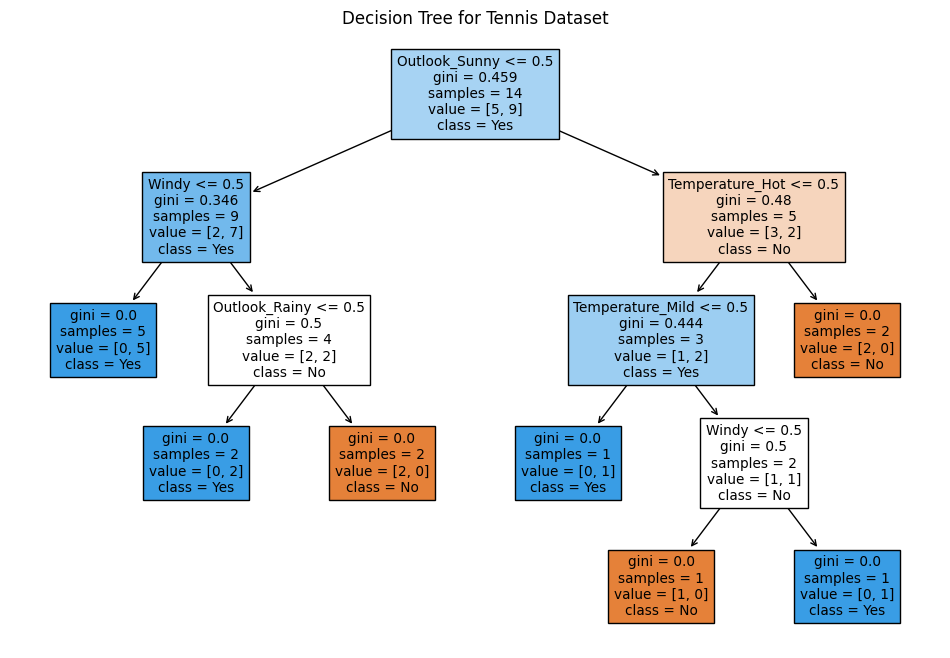

In [56]:
# Step 4: Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=data_encoded.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree for Tennis Dataset')
plt.show()

In [57]:
# Step 5: Create DataFrame for the instances to predict
instances = pd.DataFrame(columns=data_encoded.columns)

# Fill in the specific instances for prediction
instances.loc[0] = [0, 0, 1, 1, 0, 1]  # Instance 1: Overcast, Hot, High, Windy=True
instances.loc[1] = [0, 1, 0, 0, 1, 0]  # Instance 2: Rainy, Mild, Normal, Windy=False
instances.loc[2] = [1, 0, 0, 0, 1, 1]  # Instance 3: Sunny, Cool, High, Windy=True

In [58]:
# Step 6: Make predictions
predictions = clf.predict(instances)
predictions = ['Yes' if p == 1 else 'No' for p in predictions]
print("Predictions for the instances:")
for i, prediction in enumerate(predictions, start=1):
    print(f"Instance {i}: {prediction}")

Predictions for the instances:
Instance 1: No
Instance 2: Yes
Instance 3: Yes


In [59]:
# Step 7: Calculate Gini impurity for a node with 4 of class A and 6 of class B
def gini_impurity(class_counts):
    total_samples = sum(class_counts)
    impurity = 1 - sum((count / total_samples) ** 2 for count in class_counts)
    return impurity

In [60]:
# For 4 of class A and 6 of class B
class_counts = [4, 6]
gini = gini_impurity(class_counts)
print(f"Gini Impurity: {gini}")

Gini Impurity: 0.48


In [61]:
# Step 8: Decision tree with entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(data_encoded, target)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [62]:
# Make predictions with the new tree
predictions_entropy = clf_entropy.predict(instances)
predictions_entropy = ['Yes' if p == 1 else 'No' for p in predictions_entropy]
print("Predictions using Entropy:")
for i, prediction in enumerate(predictions_entropy, start=1):
    print(f"Instance {i}: {prediction}")

Predictions using Entropy:
Instance 1: No
Instance 2: Yes
Instance 3: Yes


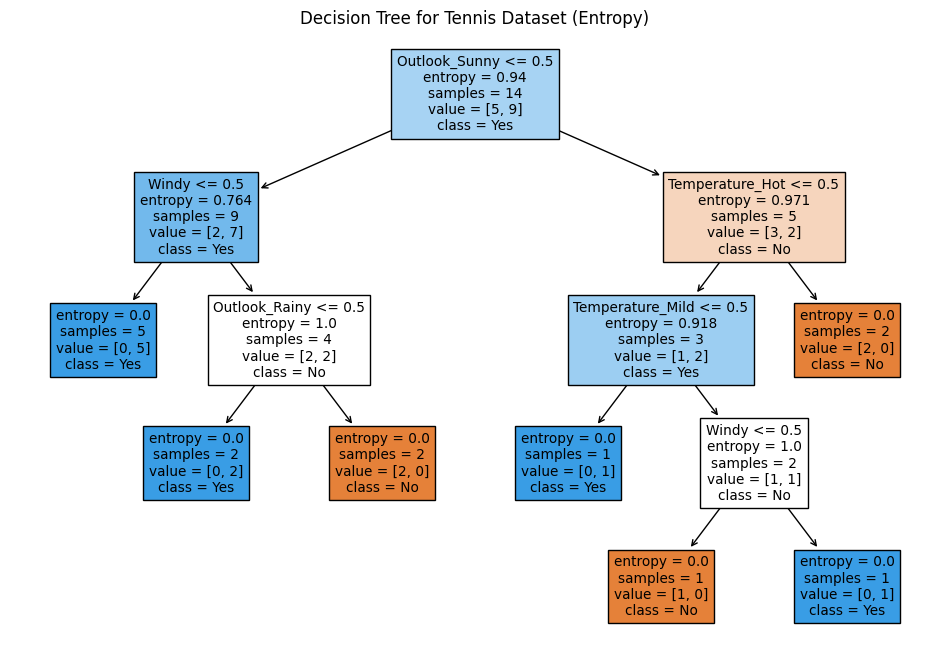

In [63]:
# Step 9: Visualize the entropy decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, feature_names=data_encoded.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree for Tennis Dataset (Entropy)')
plt.show()